<a href="https://colab.research.google.com/github/danilobsilv/Artificial-Neural-Networks_PracticalProject/blob/main/RedesNeurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alunos: <br><br>
Danilo Bruno da Silva - 2115080048 <br>
Kirk Matos Isaac Sahdo - 12312313213 <br>
Leonardo da Silva Martins - 2115080053


## **2.1. Parte I – Resolvendo um Problema Linearmente Separável**

Nesta parte, todas as equipes devem usar o arquivo dataAll.txt e construir o algoritmo de treina-
mento do neurônio perceptron para resolver o problema de classificação proposto. Alguns aspectos

devem ser considerados:
1. As equipes devem utilizar a função de ativação degrau com θ = 0;
2. O valor da taxa de aprendizado deve ser igual a η = 0,1;
3. O vetor inicial de pesos deve ter seus valores inicializados conforme uma variável aleatória de
distribuição uniforme no intervalo, isto é, wi ∼ U(−0,5, + 0,5). O vetor inicial de pesos deve
ser impresso no início da execução do algoritmo;
4. A cada época deve ser indicado o número de ajustes feitos no vetor de pesos;
5. O algoritmo deve executar até a convergência, isto é, até que não haja erros para todos os
exemplos presentes no conjunto de treinamento;
6. Ao final, deve-se imprimir:
(a) O número total de ajustes no vetor de pesos;
(b) O número de épocas até a convergência;
(c) O gráfico contendo todos os exemplos do conjunto de dados e a reta que separa as classes
obtida como resultado do treinamento do neurônio Perceptron. Respeitar o esquema de
cores proposto inicialmente e apresentar a solução de maneira clara neste gráfico.

Pesos na primeira época: [ 6.88934704e-02  2.15828070e+02 -2.25404613e+02]
Número total de ajustes nos pesos: 18.200000000000006
Número de épocas até a convergência: 11


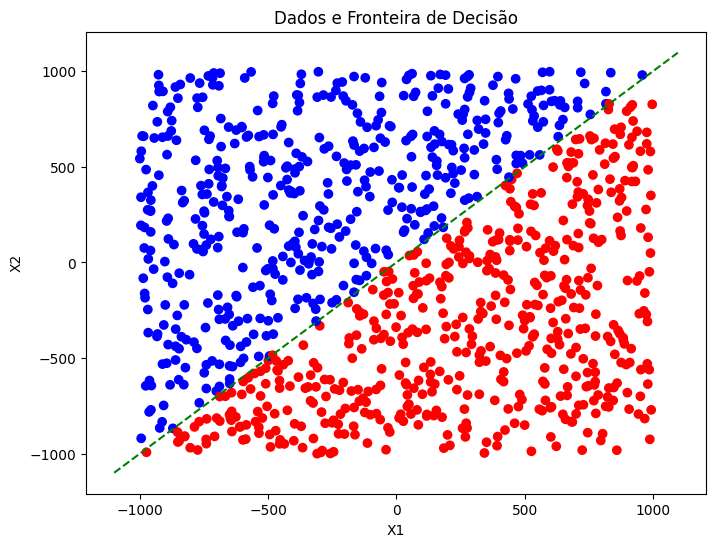

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, tamanho_entrada, taxa_aprendizado=0.1):
        # Inicialização dos pesos aleatórios com uma distribuição uniforme
        self.pesos = np.random.uniform(-0.5, 0.5, tamanho_entrada + 1)  # +1 para incluir o bias
        self.taxa_aprendizado = taxa_aprendizado

    def prever(self, entradas):
        # Função de ativação: degrau unitário
        soma = np.dot(entradas, self.pesos[1:]) + self.pesos[0]  # incluindo o bias
        return 1 if soma > 0 else 0

    def treinar(self, entradas_treinamento, rotulos):
        epocas = 0
        ajustes_totais = 0
        convergiu = False

        while not convergiu:
            ajustes_epoca = 0
            for entradas, rotulo in zip(entradas_treinamento, rotulos):
                previsao = self.prever(entradas)
                ajuste = self.taxa_aprendizado * (rotulo - previsao)
                self.pesos[1:] += ajuste * entradas
                self.pesos[0] += ajuste
                ajustes_epoca += np.abs(ajuste)

            if epocas == 0:  # Se é a primeira época, imprimir os pesos
                print("Pesos na primeira época:", self.pesos)

            ajustes_totais += ajustes_epoca
            epocas += 1
            if ajustes_epoca == 0:
                convergiu = True

        return epocas, ajustes_totais

def plotar_dados_e_linha(dados_treinamento, rotulos, perceptron):
    plt.figure(figsize=(8, 6))
    plt.scatter(dados_treinamento[:, 0], dados_treinamento[:, 1], c=rotulos, cmap=plt.cm.bwr)

    x_vals = np.array(plt.gca().get_xlim())
    y_vals = (-perceptron.pesos[0] - perceptron.pesos[1] * x_vals) / perceptron.pesos[2]
    plt.plot(x_vals, y_vals, '--', color='green')

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Dados e Fronteira de Decisão')
    plt.show()

def carregar_dados(caminho_arquivo):
    # Carregar o conteúdo do arquivo de texto
    dados = np.fromfile(caminho_arquivo)
    dados = dados.reshape(-1, 3)
    return dados

# Exemplo de uso
if __name__ == "__main__":
    # Carregando os dados do arquivo de texto
    dados = carregar_dados('dataAll.txt')

    # Separando os inputs (X) dos rótulos (y)
    X = dados[:, :2]
    y = dados[:, 2]

    # Criando e treinando o Perceptron
    perceptron = Perceptron(tamanho_entrada=2)
    epocas, ajustes_totais = perceptron.treinar(X, y)

    # Imprimindo resultados
    print("Número total de ajustes nos pesos:", ajustes_totais)
    print("Número de épocas até a convergência:", epocas)

    # Plotando os dados e a linha de decisão
    plotar_dados_e_linha(X, y, perceptron)


# **2.2 Parte II – Experimentação**

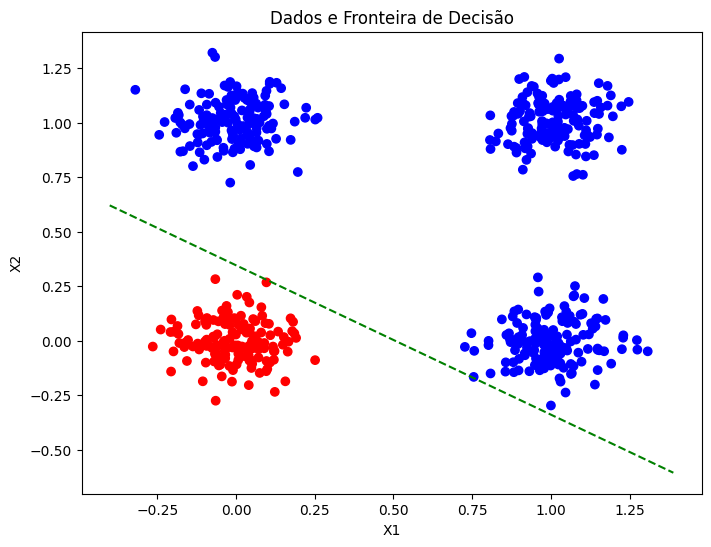

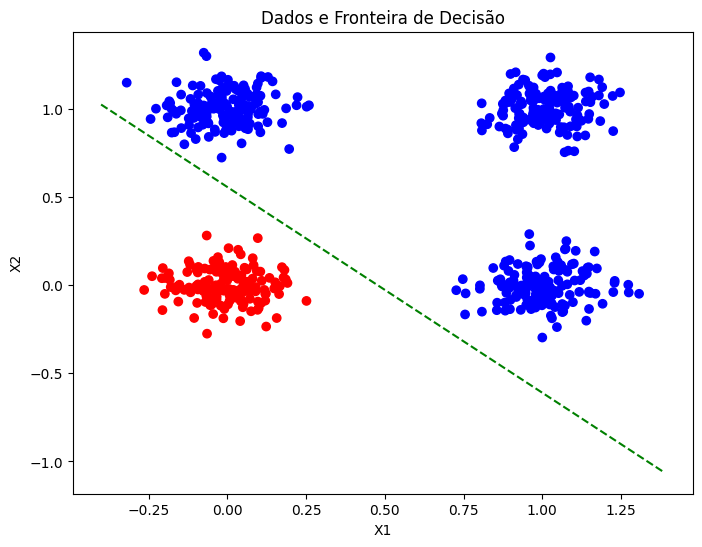

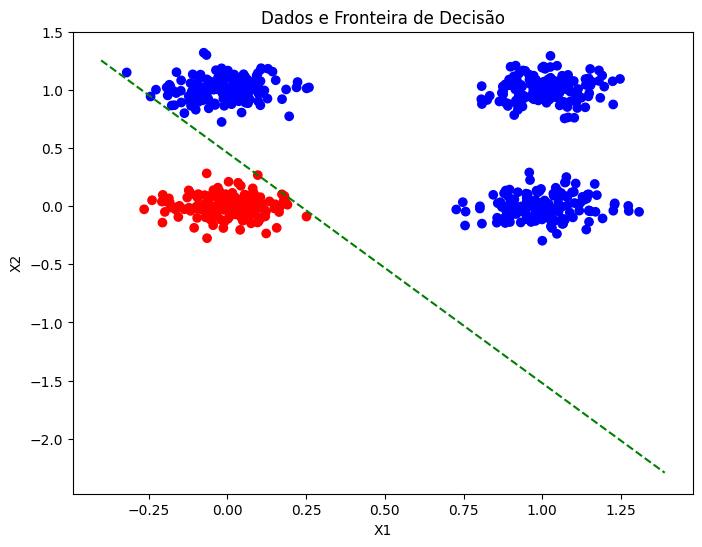

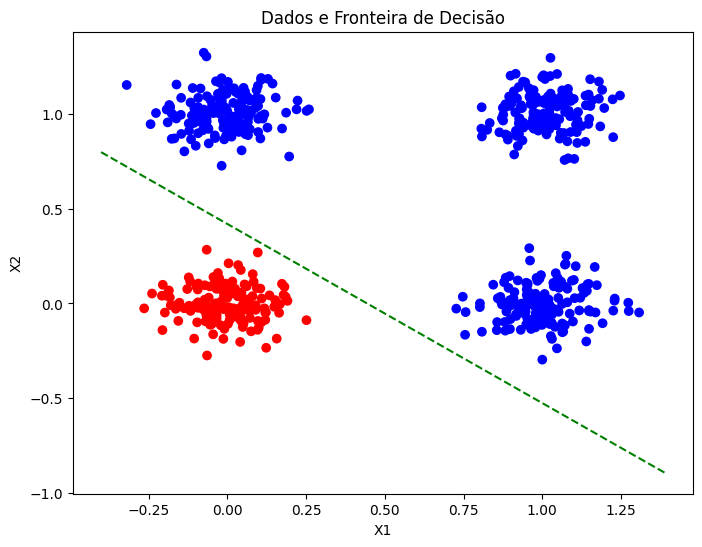

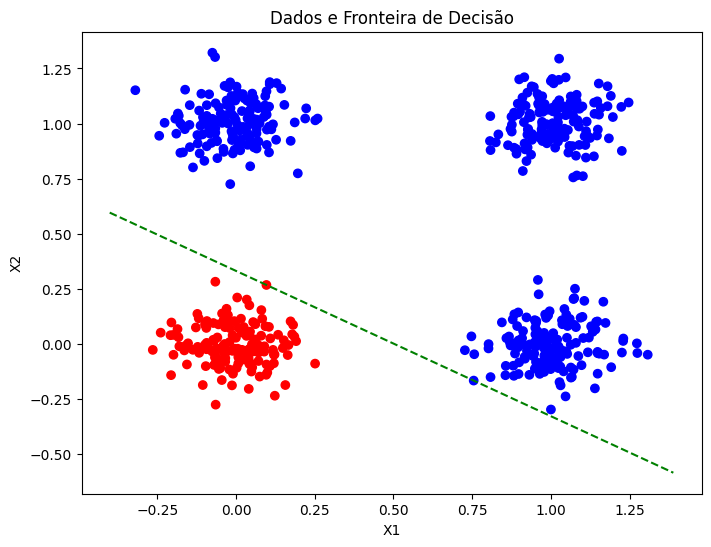

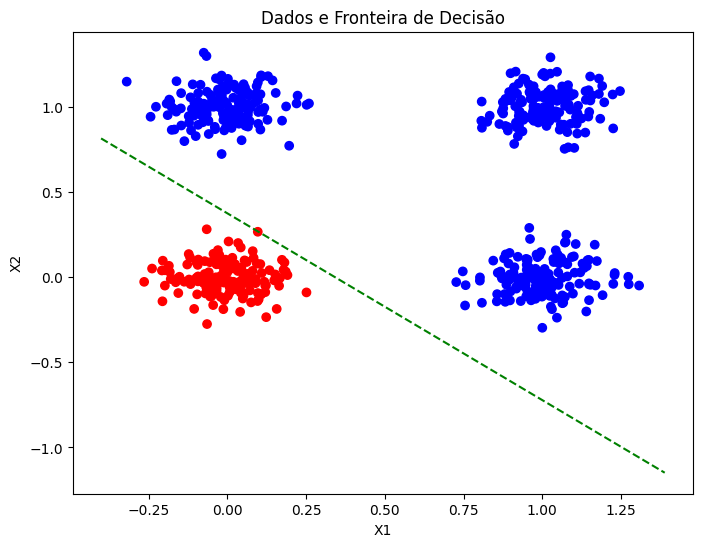

+---------------------+--------------------+-----------------------------+---------------------------------------+
| Taxa de Aprendizado | Intervalo de Pesos | Qtd de Ajustes (Média ± DP) | Menor Num de Épocas para Convergência |
+---------------------+--------------------+-----------------------------+---------------------------------------+
|       η = 0.4       |    (-100, 100)     |        148.32 ± 80.65       |                   6                   |
|       η = 0.4       |    (-0.5, 0.5)     |         4.52 ± 2.47         |                   3                   |
|       η = 0.1       |    (-100, 100)     |        119.32 ± 44.45       |                   13                  |
|       η = 0.1       |    (-0.5, 0.5)     |         1.73 ± 1.02         |                   2                   |
|       η = 0.01      |    (-100, 100)     |        143.88 ± 45.22       |                   72                  |
|       η = 0.01      |    (-0.5, 0.5)     |         0.84 ± 0.43         |      

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable

class Perceptron:
    def __init__(self, tamanho_entrada, taxa_aprendizado=0.1, intervalo_pesos=(-0.5, 0.5)):
        self.pesos = np.random.uniform(intervalo_pesos[0], intervalo_pesos[1], tamanho_entrada + 1)  # Inicialização dos pesos
        self.taxa_aprendizado = taxa_aprendizado

    def prever(self, entradas):
        soma = np.dot(entradas, self.pesos[1:]) + self.pesos[0]
        return 1 if soma > 0 else 0

    def treinar(self, entradas_treinamento, rotulos):
        epocas = 0
        ajustes_totais = 0
        convergiu = False

        while not convergiu:
            ajustes_epoca = 0
            for entradas, rotulo in zip(entradas_treinamento, rotulos):
                previsao = self.prever(entradas)
                ajuste = self.taxa_aprendizado * (rotulo - previsao)
                self.pesos[1:] += ajuste * entradas
                self.pesos[0] += ajuste
                ajustes_epoca += np.abs(ajuste)

            ajustes_totais += ajustes_epoca
            epocas += 1
            if ajustes_epoca == 0:
                convergiu = True

        return epocas, ajustes_totais

def carregar_dados(caminho_arquivo):
    dados = np.fromfile(caminho_arquivo, dtype=np.float64)
    dados = dados.reshape(-1, 3)
    X = dados[:, :2]
    y = dados[:, 2]
    return X, y

def plotar_dados_e_linha(dados_treinamento, rotulos, perceptron):
    plt.figure(figsize=(8, 6))
    plt.scatter(dados_treinamento[:, 0], dados_treinamento[:, 1], c=rotulos, cmap=plt.cm.bwr)

    x_vals = np.array(plt.gca().get_xlim())
    y_vals = (-perceptron.pesos[0] - perceptron.pesos[1] * x_vals) / perceptron.pesos[2]
    plt.plot(x_vals, y_vals, '--', color='green')

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Dados e Fronteira de Decisão')
    plt.show()

def executar_experimento(caminho_arquivo, taxas_aprendizado, intervalos_pesos, repeticoes=10):
    X, y = carregar_dados(caminho_arquivo)
    resultados = []

    for taxa in taxas_aprendizado:
        for intervalo in intervalos_pesos:
            ajustes_lista = []
            epocas_lista = []

            for _ in range(repeticoes):
                perceptron = Perceptron(tamanho_entrada=2, taxa_aprendizado=taxa, intervalo_pesos=intervalo)
                epocas, ajustes = perceptron.treinar(X, y)
                ajustes_lista.append(ajustes)
                epocas_lista.append(epocas)

            media_ajustes = np.mean(ajustes_lista)
            desvio_padrao_ajustes = np.std(ajustes_lista)
            menor_epocas = np.min(epocas_lista)
            resultados.append((taxa, intervalo, media_ajustes, desvio_padrao_ajustes, menor_epocas))

            # Plotando a última repetição para cada configuração
            plotar_dados_e_linha(X, y, perceptron)

    return resultados

def imprimir_tabela(resultados):
    tabela = PrettyTable()
    tabela.field_names = ["Taxa de Aprendizado", "Intervalo de Pesos", "Qtd de Ajustes (Média ± DP)", "Menor Num de Épocas para Convergência"]

    for resultado in resultados:
        taxa, intervalo, media_ajustes, desvio_padrao_ajustes, menor_epocas = resultado
        tabela.add_row([f"η = {taxa}", f"{intervalo}", f"{media_ajustes:.2f} ± {desvio_padrao_ajustes:.2f}", menor_epocas])

    print(tabela)

if __name__ == "__main__":
    taxas_aprendizado = [0.4, 0.1, 0.01]
    intervalos_pesos = [(-100, 100), (-0.5, 0.5)]
    caminho_arquivo = '/content/sample_data/data2.txt'  # Ajustar conforme o identificador da equipe

    resultados = executar_experimento(caminho_arquivo, taxas_aprendizado, intervalos_pesos)
    imprimir_tabela(resultados)


célula de teste